### Bike sharing
##### Import libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math 

# machine learning
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score



In [2]:
bike_rentals = pd.read_csv('hour.csv')

In [4]:
bike_rentals.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [11]:
#Check for missing values
print(bike_rentals.isnull().sum())
print('Data already clean so no cleaning required')

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
Data already clean so no cleaning required


In [16]:
# Get summary statistics
print(bike_rentals.describe())
print('Most of this is useless as several numerical columns in the data are rather catigorical')

          instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.

In [20]:
# Correlation 

bike_rentals.corr()['cnt']**2

instant       0.077495
season        0.031704
yr            0.062748
mnth          0.014553
hr            0.155292
holiday       0.000956
weekday       0.000724
workingday    0.000917
weathersit    0.020285
temp          0.163841
atemp         0.160744
hum           0.104271
windspeed     0.008693
casual        0.482419
registered    0.945077
cnt           1.000000
Name: cnt, dtype: float64

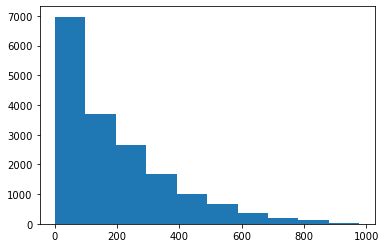

In [58]:
plt.hist(bike_rentals["cnt"])
plt.show()

In [24]:
minimum = bike_rentals.cnt.min()
maximum = bike_rentals.cnt.max()
bike_rentals[bike_rentals.cnt == maximum]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
14773,14774,2012-09-12,3,1,9,18,0,3,1,1,0.66,0.6212,0.44,0.2537,91,886,977


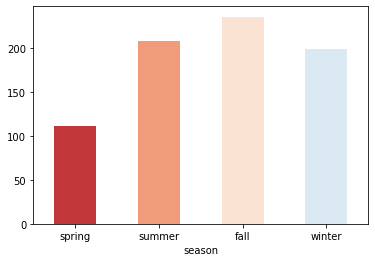

In [51]:
# What is the influence of season on cnt
label = {'1':'spring', '2':'summer', '3':'fall', '4':'winter'}
bike_rentals.groupby('season').cnt.mean().plot.bar(color = sns.color_palette('RdBu'))
plt.xticks(ticks = np.arange(4),labels = label.values() ,rotation = False)
plt.show()


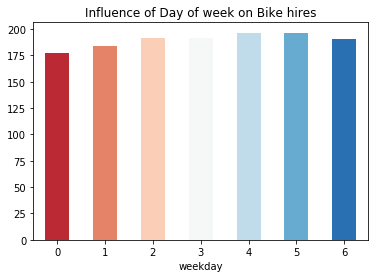

In [56]:
bike_rentals.groupby('weekday').cnt.mean().plot.bar(color = sns.color_palette('RdBu', len('weekday')))
plt.xticks(rotation = False)
plt.title('Influence of Day of week on Bike hires')
plt.show()


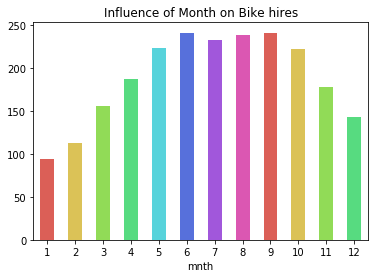

In [64]:
bike_rentals.groupby('mnth').cnt.mean().plot.bar(color = sns.color_palette('hls', 8))
plt.xticks(rotation = False)
plt.title('Influence of Month on Bike hires')
plt.show()

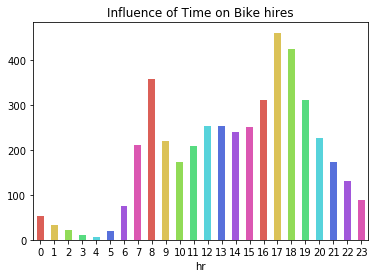

In [61]:
bike_rentals.groupby('hr').cnt.mean().plot.bar(color = sns.color_palette('hls', 8))
plt.xticks(rotation = False)
plt.title('Influence of Time on Bike hires')
plt.show()

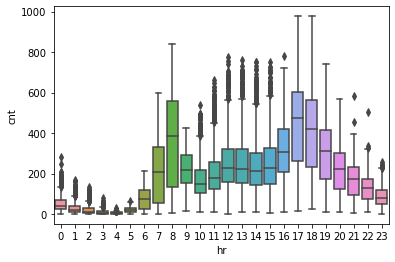

In [6]:
#. compare boxplots of hr and time_label

sns.boxplot('hr','cnt',data=bike_rentals)
plt.show()

sns.boxplot('hr','cnt',data=bike_rentals)
plt.show()

### Feature engineering
1. Time (hr) is too granular currently has R2 of 0.16. Aggregate time to 4 groups
- 6 to 12 = 1
- 12 to 18 = 2
- 18 to 24 = 3
- 0 to 6 = 4

this will be done with function: group_time and assigned to column time_lable

In [3]:
def group_time(row):
    time = row.hr
    if time >=0 and time < 6:
        return 4
    elif time >=6 and time < 12:
        return 1
    elif time >= 12 and time < 18:
        return 2
    elif time >= 18 and time <=24:
        return 3

In [4]:
bike_rentals['time_label'] = bike_rentals.apply(group_time, axis=1)#.value_counts()#.sum()

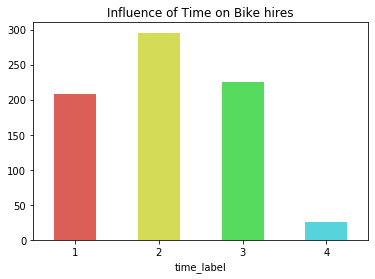

In [5]:
bike_rentals.groupby('time_label').cnt.mean().plot.bar(color = sns.color_palette('hls'))
plt.xticks(rotation = False)
plt.title('Influence of Time on Bike hires')
plt.show()

In [88]:
#check correlations again to see if R2 changes with this
bike_rentals.corr().cnt**2

instant       0.077495
season        0.031704
yr            0.062748
mnth          0.014553
hr            0.155292
holiday       0.000956
weekday       0.000724
workingday    0.000917
weathersit    0.020285
temp          0.163841
atemp         0.160744
hum           0.104271
windspeed     0.008693
casual        0.482419
registered    0.945077
cnt           1.000000
time_label    0.143125
Name: cnt, dtype: float64

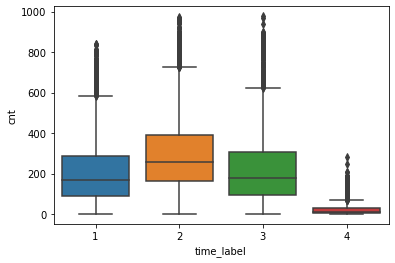

In [9]:
sns.boxplot('time_label','cnt',data=bike_rentals)
plt.show()

In [10]:
bike_rentals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
 17  time_label  17379 non-null  int64  
dtypes: float64(4), int64(13), object(1)
memory usage: 2.4+ MB


In [11]:
bike_rentals.columns.to_list()
cols_to_remove = ['cnt','registered','casual','dteday', 'instant']
predict_cols = []
for i in bike_rentals.columns.to_list():
    if i in cols_to_remove:
        pass
    else:
        predict_cols.append(i)
predict_cols

['season',
 'yr',
 'mnth',
 'hr',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'time_label']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(bike_rentals[predict_cols], bike_rentals.cnt, test_size=0.2, random_state=42)

Training -- R2: 0.47083208828886947 rmse: 132.54958784135627
Testing -- R2: 0.4590379059694224 rmse: 130.88081305107033


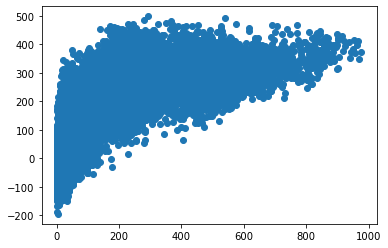

In [61]:
## Linear regression
lin_mod = LinearRegression()
lin_mod.fit(X_train,y_train)
train_pred=lin_mod.predict(X_train)
test_pred = lin_mod.predict(X_test)

print('Training -- R2:', r2_score(y_train, train_pred), 'rmse:', mean_squared_error(y_train, train_pred)**0.5)
print('Testing -- R2:', r2_score(y_test, test_pred), 'rmse:', mean_squared_error(y_test, test_pred)**0.5)
plt.scatter(y_train, train_pred)

Training -- R2: 0.84381780881205 rmse: 72.01075874137837
Testing -- R2: 0.8334370076432639 rmse: 72.62427738991381


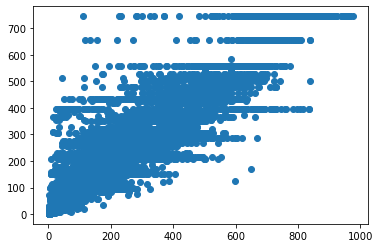

In [62]:
##.  DecisionTreeRegressor
dec_model = DecisionTreeRegressor(max_depth=8,random_state=5)
dec_model.fit(X_train,y_train)
train_pred=dec_model.predict(X_train)
test_pred = dec_model.predict(X_test)

print('Training -- R2:', r2_score(y_train, train_pred), 'rmse:', mean_squared_error(y_train, train_pred)**0.5)
print('Testing -- R2:', r2_score(y_test, test_pred), 'rmse:', mean_squared_error(y_test, test_pred)**0.5)
plt.scatter(y_train, train_pred)

Training -- R2: 0.952532684953073 rmse: 39.698944909808155
Testing -- R2: 0.9316830749549365 rmse: 46.511111928159906
Hyperparameter tuning could improve rmse


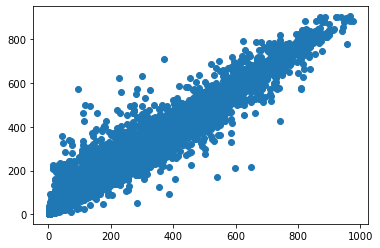

In [60]:
##.  DecisionTreeRegressor
ran_model = RandomForestRegressor(n_estimators=150, min_samples_leaf=8, random_state=5)
ran_model.fit(X_train,y_train)
train_pred=ran_model.predict(X_train)
test_pred = ran_model.predict(X_test)

print('Training -- R2:', r2_score(y_train, train_pred), 'rmse:', mean_squared_error(y_train, train_pred)**0.5)
print('Testing -- R2:', r2_score(y_test, test_pred), 'rmse:', mean_squared_error(y_test, test_pred)**0.5)
print('Hyperparameter tuning could improve rmse')

plt.scatter(y_train, train_pred)

#  Random forest tuning
1. create loop that will run through hyper parameters and find optimum
2. Plot graphs of distribution

Time_label seems to give less signal (aggregation of hr col - R2 value is less) but it does show a nice trend from the boxplot

In [25]:
creating own colour maps

# import matplotlib.pyplot as plt
# import matplotlib.colors as mcolors
# import numpy as np

# clist = [(0, "red"), (0.125, "red"), (0.25, "orange"), (0.5, "green"), 
#          (0.7, "green"), (0.75, "blue"), (1, "blue")]
# rvb = mcolors.LinearSegmentedColormap.from_list("", clist)

# N = 60
# x = np.arange(N).astype(float)
# y = np.random.uniform(0, 5, size=(N,))

# plt.bar(x,y, color=rvb(x/N))
# plt.show()

SyntaxError: invalid syntax (<ipython-input-25-cdb9e2f4f009>, line 1)